In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
import tensorflow.keras.layers as layers

#### Starting the data analysis

In [ ]:
nfl_df = pd.read_csv('../data/cleaned_data.csv')

#### Trying out splitting away data and home data and then training on the split data. 
##### If this doesn't work keep as one vector and then train on the full data.

In [ ]:
# getting the specific labels for the home and away teams
away_cols = [col for col in nfl_df.columns if 'away' in col]
home_cols = [col for col in nfl_df.columns if 'home' in col][:-1]

In [ ]:
# making the specific DataFrames for the home and away data
home_df = nfl_df.drop(away_cols, axis=1)
away_df = nfl_df.drop(home_cols, axis=1)

In [ ]:
nfl_df.describe()

,away_team,home_team,away_st_downs,home_st_downs,away_passing_st_downs,home_passing_st_downs,away_rushing_st_downs,home_rushing_st_downs,away_st_downs_from_penalties,home_st_downs_from_penalties,...,home_penalties,away_turnovers,home_turnovers,away_fumbles_lost,home_fumbles_lost,away_defensive_special_teams_tds,home_defensive_special_teams_tds,away_possession,home_possession,home_wins
count,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,...,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000,1419.000000
mean,15.493305,15.427061,19.463002,20.295278,11.957012,12.182523,5.677942,6.036646,1.828048,2.076110,...,0.126379,1.448908,1.399577,0.593376,0.558844,0.315715,0.341085,1791.439746,1808.558844,0.564482
std,9.201118,9.247468,4.908098,4.927634,3.890096,3.911551,2.947570,2.972380,1.411729,1.528705,...,0.045779,1.267208,1.278674,0.794186,0.763148,0.794267,0.820624,258.009296,258.007506,0.495999
min,0.000000,0.000000,5.000000,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1031.000000,1085.000000,0.000000
25%,8.000000,7.000000,16.000000,17.000000,9.000000,10.000000,4.000000,4.000000,1.000000,1.000000,...,0.101868,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1607.000000,1637.000000,0.000000
50%,15.000000,16.000000,19.000000,20.000000,12.000000,12.000000,5.000000,6.000000,2.000000,2.000000,...,0.120879,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1791.000000,1809.000000,1.000000
75%,23.000000,23.000000,23.000000,24.000000,15.000000,15.000000,7.000000,8.000000,3.000000,3.000000,...,0.142857,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1963.000000,1993.000000,1.000000
max,31.000000,31.000000,35.000000,40.000000,26.000000,25.000000,20.000000,19.000000,8.000000,10.000000,...,1.000000,8.000000,7.000000,5.000000,4.000000,5.000000,6.000000,2515.000000,2569.000000,1.000000


In [ ]:
nfl_df.corr()

,away_team,home_team,away_st_downs,home_st_downs,away_passing_st_downs,home_passing_st_downs,away_rushing_st_downs,home_rushing_st_downs,away_st_downs_from_penalties,home_st_downs_from_penalties,...,home_penalties,away_turnovers,home_turnovers,away_fumbles_lost,home_fumbles_lost,away_defensive_special_teams_tds,home_defensive_special_teams_tds,away_possession,home_possession,home_wins
away_team,1.000000,0.015549,-0.073818,-0.047700,-0.031621,-0.037989,-0.078543,-0.053032,-0.005518,0.046564,...,-0.040901,0.010994,-0.033609,-0.002930,-0.030149,0.002605,0.022438,0.010755,-0.010761,0.057617
home_team,0.015549,1.000000,0.004544,-0.066051,0.003412,-0.011456,-0.016864,-0.096987,0.041606,0.004982,...,-0.014204,-0.037675,0.004345,-0.041827,-0.001265,-0.006272,0.022796,0.008194,-0.008188,-0.042908
away_st_downs,-0.073818,0.004544,1.000000,-0.130778,0.737585,-0.017849,0.516843,-0.190173,0.365079,-0.006110,...,0.018296,-0.045007,-0.082426,0.009616,-0.089839,-0.093965,0.015917,0.571891,-0.571889,-0.229972
home_st_downs,-0.047700,-0.066051,-0.130778,1.000000,-0.003936,0.734739,-0.197033,0.500388,-0.032435,0.370459,...,-0.033474,-0.051058,-0.030155,-0.030567,-0.018032,0.028058,-0.078290,-0.546369,0.546366,0.226353
away_passing_st_downs,-0.031621,0.003412,0.737585,-0.003936,1.000000,0.022113,-0.122001,-0.045972,0.063502,0.020118,...,0.045624,0.057708,-0.162848,0.072405,-0.144884,-0.125703,0.034199,0.304226,-0.304226,-0.004959
home_passing_st_downs,-0.037989,-0.011456,-0.017849,0.734739,0.022113,1.000000,-0.069888,-0.133229,0.022928,0.068673,...,-0.027917,-0.109305,0.083402,-0.050779,0.038097,0.091529,-0.094985,-0.304035,0.304029,0.021373
away_rushing_st_downs,-0.078543,-0.016864,0.516843,-0.197033,-0.122001,-0.069888,1.000000,-0.204552,0.045151,-0.058568,...,0.050504,-0.155924,0.079823,-0.080986,0.044328,0.025087,-0.032398,0.481258,-0.481259,-0.335261
home_rushing_st_downs,-0.053032,-0.096987,-0.190173,0.500388,-0.045972,-0.133229,-0.204552,1.000000,-0.107401,0.009474,...,-0.023635,0.094486,-0.166397,0.034996,-0.080540,-0.104674,0.014243,-0.441761,0.441767,0.341845
away_st_downs_from_penalties,-0.005518,0.041606,0.365079,-0.032435,0.063502,0.022928,0.045151,-0.107401,1.000000,0.045608,...,-0.167557,0.010065,-0.004494,0.003009,-0.005657,-0.032683,0.028747,0.145132,-0.145126,-0.085875
home_st_downs_from_penalties,0.046564,0.004982,-0.006110,0.370459,0.020118,0.068673,-0.058568,0.009474,0.045608,1.000000,...,0.009487,-0.068615,0.012932,-0.036644,0.000994,0.059767,-0.037011,-0.124275,0.124265,0.010264


##### Because 4th downs occur at such a low rate in games we can get rid of the 4th down columns. 
##### It also looks like the sack yardage doesn't play into the winning probability of the home team and home penalties

In [ ]:
home_win_corr = nfl_df.corr()['home_wins']
print(home_win_corr)

away_team                           0.057617
home_team                          -0.042908
away_st_downs                      -0.229972
home_st_downs                       0.226353
away_passing_st_downs              -0.004959
home_passing_st_downs               0.021373
away_rushing_st_downs              -0.335261
home_rushing_st_downs               0.341845
away_st_downs_from_penalties       -0.085875
home_st_downs_from_penalties        0.010264
away_rd_down_efficiency            -0.293300
home_rd_down_efficiency             0.285271
away_th_down_efficiency             0.019820
home_th_down_efficiency            -0.003695
away_total_plays                   -0.085266
home_total_plays                    0.068074
away_total_yards                   -0.269190
home_total_yards                    0.307540
away_total_drives                  -0.000792
home_total_drives                   0.013488
away_yards_per_play                -0.268667
home_yards_per_play                 0.320065
away_passi

#### Separating the labels from the DataFrame

In [ ]:
away_labels = away_df.pop('home_wins')
home_labels = home_df.pop('home_wins')
label_list = [away_labels, home_labels]

In [ ]:
def min_max_scaler(data: pd.Series) -> pd.Series:
    """ Function to transform the data into the range 0 to 1. """
    min_val = data.min()
    max_val = data.max()

    f = lambda x: (x - min_val) / (max_val - min_val)

    return data.map(f)

In [ ]:
df_list = [away_df, home_df]

In [ ]:
scaled_df_list = [df.apply(min_max_scaler) for df in df_list]

In [ ]:
scaled_df_list[0].head()

,away_team,away_st_downs,away_passing_st_downs,away_rushing_st_downs,away_st_downs_from_penalties,away_rd_down_efficiency,away_th_down_efficiency,away_total_plays,away_total_yards,away_total_drives,...,away_sacks_yards_lost,away_rushing,away_rushing_attempts,away_yards_per_rush,away_red_zone_made_att,away_penalties,away_turnovers,away_fumbles_lost,away_defensive_special_teams_tds,away_possession
0,0.000000,0.433333,0.44,0.25,0.125,0.488889,0.0,0.384615,0.613260,0.500000,...,0.078431,0.478114,0.409091,0.534653,0.0,0.302326,0.125,0.0,0.0,0.684636
1,0.032258,0.566667,0.60,0.20,0.250,0.244444,1.0,0.500000,0.471455,0.666667,...,0.125000,0.208754,0.159091,0.405941,0.0,0.315789,0.625,0.4,0.4,0.297170
2,0.064516,0.666667,0.52,0.50,0.125,0.514620,1.0,0.980769,0.655617,0.888889,...,0.121212,0.501684,0.500000,0.485149,0.0,0.218182,0.625,0.2,0.0,0.759434
3,0.096774,0.300000,0.36,0.20,0.000,0.407407,0.0,0.346154,0.276243,0.611111,...,0.106667,0.255892,0.409091,0.287129,0.0,0.215385,0.000,0.0,0.4,0.522237
4,0.129032,0.666667,0.44,0.65,0.000,0.611111,0.0,0.576923,0.534070,0.555556,...,0.083333,0.542088,0.613636,0.445545,0.0,0.300000,0.000,0.0,0.4,0.559299


In [ ]:
func_split = list(zip(['away', 'home'], scaled_df_list, label_list))
split_data = {name: train_test_split(df, label, test_size=0.3, random_state=42) for name, df, label in func_split}

In [ ]:
# splitting the data
split_data['away'][0]

,away_team,away_st_downs,away_passing_st_downs,away_rushing_st_downs,away_st_downs_from_penalties,away_rd_down_efficiency,away_th_down_efficiency,away_total_plays,away_total_yards,away_total_drives,...,away_sacks_yards_lost,away_rushing,away_rushing_attempts,away_yards_per_rush,away_red_zone_made_att,away_penalties,away_turnovers,away_fumbles_lost,away_defensive_special_teams_tds,away_possession
788,0.774194,0.766667,0.72,0.35,0.250,0.376068,1.00,0.673077,0.499079,0.666667,...,0.095238,0.356902,0.386364,0.415842,0.400000,0.250000,0.250,0.2,0.0,0.609164
124,0.903226,0.533333,0.60,0.20,0.125,0.611111,0.00,0.500000,0.493554,0.555556,...,0.111111,0.316498,0.363636,0.386139,0.000000,0.228571,0.125,0.0,0.0,0.448787
178,0.096774,0.633333,0.68,0.20,0.250,0.503268,1.00,0.692308,0.591160,0.666667,...,0.000000,0.228956,0.227273,0.366337,0.750000,0.264151,0.125,0.0,0.0,0.506739
287,0.258065,0.033333,0.12,0.10,0.000,0.174603,0.00,0.288462,0.005525,0.722222,...,0.101449,0.043771,0.090909,0.108911,0.000000,0.324324,0.250,0.0,0.0,0.254717
1367,0.161290,0.500000,0.56,0.20,0.125,0.523810,1.00,0.461538,0.458564,0.611111,...,0.105263,0.178451,0.409091,0.198020,0.400000,0.300000,0.000,0.0,0.2,0.576146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.516129,0.366667,0.44,0.15,0.125,0.305556,1.00,0.442308,0.388582,0.555556,...,0.133333,0.198653,0.227273,0.316832,0.333333,0.222222,0.375,0.0,0.0,0.595013
1130,0.935484,0.433333,0.52,0.20,0.000,0.488889,1.00,0.307692,0.637201,0.611111,...,0.000000,0.313131,0.204545,0.534653,0.400000,0.172414,0.250,0.0,0.0,0.269542
1294,0.870968,0.800000,0.52,0.75,0.000,0.470085,0.75,0.788462,0.648250,0.555556,...,0.111111,0.680135,0.545455,0.613861,0.800000,0.233333,0.000,0.0,0.0,0.628706
860,0.741935,0.433333,0.32,0.40,0.125,0.376068,0.00,0.461538,0.451197,0.611111,...,0.102564,0.484848,0.477273,0.485149,0.142857,0.266667,0.250,0.2,0.0,0.610512


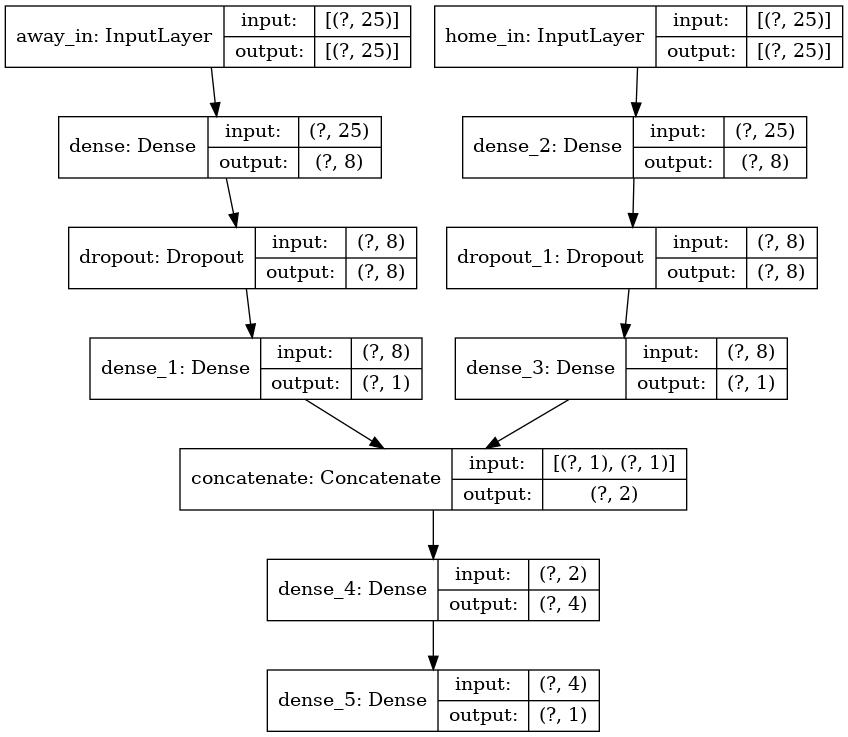

In [ ]:
# inputs for the model
home_input_data = layers.Input(shape=(split_data['home'][0].shape[-1],), name='home_in')
away_input_data = layers.Input(shape=(split_data['away'][0].shape[-1],), name='away_in')

# away data model for predictions
away_layers = layers.Dense(8, activation='relu')(away_input_data)
away_layers = layers.Dropout(rate=0.4)(away_layers)
away_layers = layers.Dense(1, activation='relu')(away_layers)

# home data model for predictions
home_layers = layers.Dense(8, activation='relu')(home_input_data)
home_layers = layers.Dropout(rate=0.4)(home_layers)
home_layers = layers.Dense(1, activation='relu')(home_layers)

# concatenating the two output layers
x = layers.concatenate([away_layers, home_layers])
x = layers.Dense(4, activation='relu')(x)
output = layers.Dense(1)(x)

model = tf.keras.Model(
    inputs=[away_input_data, home_input_data],
    outputs=[output]
)
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(0.003),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy']
)
model.fit({
    'home_in': split_data['home'][0],
    'away_in': split_data['away'][0]
}, away_labels, epochs=5000, batch_size= 128, validation_split=0.2)

7/7 [==============================] - 0s 4ms/step - loss: 0.5294 - accuracy: 0.6927 - val_loss: 1.4473 - val_accuracy: 0.4271
Epoch 4502/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.5743 - accuracy: 0.6511 - val_loss: 1.4113 - val_accuracy: 0.4221
Epoch 4503/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.5466 - accuracy: 0.6940 - val_loss: 1.3700 - val_accuracy: 0.4322
Epoch 4504/5000
7/7 [==============================] - 0s 6ms/step - loss: 0.5373 - accuracy: 0.6839 - val_loss: 1.4609 - val_accuracy: 0.4070
Epoch 4505/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.5356 - accuracy: 0.6738 - val_loss: 1.4541 - val_accuracy: 0.4221
Epoch 4506/5000
7/7 [==============================] - 0s 5ms/step - loss: 0.5562 - accuracy: 0.6864 - val_loss: 1.3941 - val_accuracy: 0.4271
Epoch 4507/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.5352 - accuracy: 0.6990 - val_loss: 1.4312 - val_accuracy: 0.4271
Epoch 4508/5000

In [ ]:
y_pred = model.predict([split_data['away'][1], split_data['home'][1]])

In [ ]:
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]

In [ ]:
list(zip(split_data['home'][-1], y_pred))

[(1, 0),
 (0, 1),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 1),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (1, 1),
 (1, 0),
 (1, 0),
 (1, 0),
 (1, 0),
 (0, 0),
 (1, 0),
 (1, 0),
 (0, 1),
 (1, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 1),
 (1, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (0, 1),
 (0, 1),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 0),
 (1, 0),
 (0, 1),
 (0, 1),
 (1, 1),
 (1, 0),
 (0, 0),
 (1, 0),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 1),
 (0, 0),
 (0, 0),
 (1, 0),
 (0, 1),
 (1, 0),
 (0, 1),
 (1, 0),
 (1, 0),
 (1, 0),
 

In [ ]:
y_true = split_data.get('home')[3]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

[[122  60]
 [166  78]]
0.4694835680751174


#### Making a model that takes in the full data

In [ ]:
nfl_df = pd.read_csv('../data/cleaned_data.csv')
labels = nfl_df.pop('home_wins')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
data = min_max.fit_transform(nfl_df)
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [ ]:
data.shape

(1419, 50)

In [ ]:
# making a model that predicts a home or away win
inputs = layers.Input(shape=(data.shape[-1],))
x = layers.Dense(32, activation='relu')(inputs)
x = layers.Dropout(rate=.45)(x)
x = layers.Dense(8, activation='relu')(x)
x = layers.Dropout(rate=0.45)(x)
outputs = layers.Dense(1)(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs, name='linear_model')

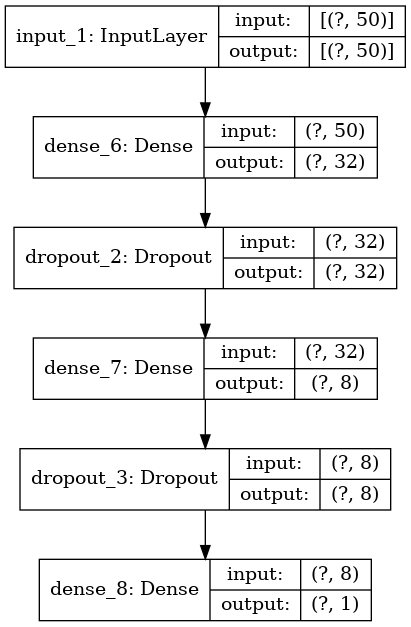

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.BinaryCrossentropy(3e-5),
    metrics=['acc']
)
model.fit(x_train, y_train, epochs=200, batch_size=128, validation_split=0.2)

Epoch 1/200
7/7 [==============================] - 0s 25ms/step - loss: 0.6812 - acc: 0.4811 - val_loss: 0.6707 - val_acc: 0.4673
Epoch 2/200
7/7 [==============================] - 0s 3ms/step - loss: 0.6639 - acc: 0.4975 - val_loss: 0.6603 - val_acc: 0.4824
Epoch 3/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6517 - acc: 0.5264 - val_loss: 0.6460 - val_acc: 0.5126
Epoch 4/200
7/7 [==============================] - 0s 6ms/step - loss: 0.6426 - acc: 0.5504 - val_loss: 0.6432 - val_acc: 0.5678
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6483 - acc: 0.5403 - val_loss: 0.6340 - val_acc: 0.6030
Epoch 6/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6226 - acc: 0.5919 - val_loss: 0.6193 - val_acc: 0.6181
Epoch 7/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6254 - acc: 0.5806 - val_loss: 0.6155 - val_acc: 0.6884
Epoch 8/200
7/7 [==============================] - 0s 4ms/step - loss: 0.6270 - acc: 0.5605 - va

In [ ]:
y_pred = [1 if y >= 0.5 else 0 for y in model.predict(x_test)]

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[151  31]
 [ 15 229]]
0.892018779342723


#### Making the model using PyTorch instead of TensorFlow for comparisons

In [ ]:
import torch 
import torch.nn as nn 
import torch.nn.functional as f

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
nfl_df = pd.read_csv('../data/cleaned_data.csv')
targets = torch.tensor(nfl_df.pop('home_wins'), dtype=torch.float).view(-1, 1)
data = nfl_df.to_numpy()

In [ ]:
# preprocess and normalize the data
mm = MinMaxScaler()
data = torch.tensor(mm.fit_transform(data), dtype=torch.float)

In [ ]:
print(data[:5])
print(targets[:5])

tensor([[0.0000, 0.4839, 0.4333, 0.2857, 0.4400, 0.3913, 0.2500, 0.1579, 0.1250,
         0.1000, 0.4889, 0.3939, 0.0000, 1.0000, 0.3846, 0.3214, 0.6133, 0.3141,
         0.5000, 0.5000, 0.6747, 0.3462, 0.5892, 0.3443, 0.6824, 0.5578, 0.6408,
         0.3520, 0.1667, 0.0000, 0.0784, 0.0577, 0.4781, 0.2174, 0.4091, 0.2708,
         0.5347, 0.3636, 0.0000, 0.0000, 0.3023, 0.1212, 0.1250, 0.1429, 0.0000,
         0.2500, 0.0000, 0.0000, 0.6846, 0.3154],
        [0.0323, 0.8065, 0.5667, 0.6000, 0.6000, 0.5652, 0.2000, 0.4211, 0.2500,
         0.3000, 0.2444, 0.3939, 1.0000, 0.0000, 0.5000, 0.6071, 0.4715, 0.6204,
         0.6667, 0.8333, 0.4458, 0.4872, 0.5954, 0.6062, 0.2853, 0.4731, 0.4085,
         0.6080, 0.5000, 0.2000, 0.1250, 0.0526, 0.2088, 0.3101, 0.1591, 0.5625,
         0.4059, 0.2828, 0.0000, 0.0000, 0.3158, 0.1458, 0.6250, 0.1429, 0.4000,
         0.0000, 0.4000, 0.0000, 0.2972, 0.7028],
        [0.0645, 0.6452, 0.6667, 0.2000, 0.5200, 0.2174, 0.5000, 0.1579, 0.1250,
         

In [ ]:
data_train, data_test, y_train, y_test = train_test_split(data, targets, test_size=0.3, random_state=42)

In [ ]:
import torch 
import torch.nn as nn
import torch.nn.functional as f

class LogisticRegression(nn.Module):

    def __init__(self, input_shape: tuple):
        super(LogisticRegression, self).__init__()

        # Will use a linear model to train, and then when propogating will pass it 
        # to a sigmoid function to truncate the results to [0, 1]
        self.input_layer = nn.Linear(input_shape[1], 32)
        self.hidden_one = nn.Linear(32, 16)
        self.drop_out_one = nn.Dropout(p=0.45)
        self.hidden_two = nn.Linear(16, 8)
        self.drop_out_two = nn.Dropout(p=0.45)
        self.out = nn.Linear(8, 1)

    def forward(self, x):
        """ Performing the forward pass of the model. """
        x = f.relu(self.input_layer(x))
        x = f.relu(self.hidden_one(x))
        x = self.drop_out_one(x)
        x = f.relu(self.hidden_two(x))
        x = self.drop_out_two(x)
        return torch.sigmoid(self.out(x))

In [ ]:
# setting up the model 
model = LogisticRegression(data.shape)
epochs = 200
batch_size = 128
optimizer = torch.optim.RMSprop(model.parameters(), lr=3e-3)

# choosing binary cross entropy because there are only two choices 0 or 1
loss_fn = nn.functional.binary_cross_entropy
loss_history = list()

for epoch in range(epochs):
    for batch in range(0, len(data_train), batch_size):
        # make prediction and feed to loss function
        pred = model(data_train[batch: batch+batch_size])
        loss = loss_fn(pred, y_train[batch: batch+batch_size])
        loss_history.append(loss)

        # backpropagate and step the optimizer
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

print(loss_history[-5:-1])    

pred = model(data_test)

[tensor(0.1550, grad_fn=<BinaryCrossEntropyBackward>), tensor(0.1734, grad_fn=<BinaryCrossEntropyBackward>), tensor(0.1481, grad_fn=<BinaryCrossEntropyBackward>), tensor(0.0977, grad_fn=<BinaryCrossEntropyBackward>)]


In [ ]:
pred = torch.tensor([1 if value >= 0.5 else 0 for [value] in pred]).view(-1, 1)

In [ ]:
print(pred[:10])
print(y_test[:10])

tensor([[1],
        [0],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [1],
        [0]])
tensor([[1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.]])


In [ ]:
print(confusion_matrix(y_test, pred))
print(accuracy_score(y_test, pred))

[[158  24]
 [ 27 217]]
0.8802816901408451
